### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independant variable is whether or not the list of colors are congruent or not. 
The dependant variable is the reading time.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis (H0) is that there is no statistical difference in the time it takes to read lists of congruent and incongruent words.

The alternative hypothesis (H1) is that there is a statistically significant different in reading lists of congruent and incongruent words. 

H0: μ1 = μ2

H1: μ1 ≠ μ2

Where μ1 = mean of population 1 and μ2 = mean of population 2

I'll use a dependent t-test for paired samples, since each person is sampled twice, once with a congruent list, and once with an incongruent list. (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html)

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#read in data
data = pd.read_csv('stroopdata.csv')

In [2]:
data['Congruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [3]:
data['Incongruent'].describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

The mean of the congruent data is 14.05, while the mean of the incongruent data is 22.02. The minimum and maximum values of congruent data are 8.63 and 22.32, while the minimum and maximum values of the incongruent data are 15.68 and 35.22. These three pieces of information indicate to me that reading a list of incongruent words does indeed take longer than reading a list of congruent words, but that is what I will find more certainly very shortly. 

The standard deviation of each data set are similar (3.56 and 4.80), with the incongruent data being slightly more spread. The range of the congruent data is 13.7, and the range of the incongruent data is 19.57. The indicate to me that the spread of each data set are similar, perhaps significantly so, but perhaps not. Time (and statistics) will tell.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

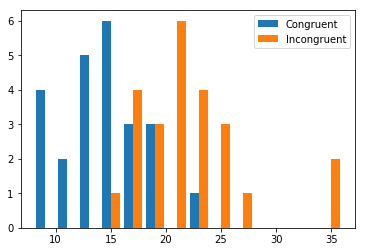

In [4]:
bins = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
x1 = data['Congruent']
x2 = data ['Incongruent']

plt.hist([x1,x2],bins,label=['Congruent','Incongruent'])
plt.legend(loc='upper right');

In the graph above, I've created a histogram of each data set, with bin size of 2 seconds. Beginning at the minimum (of both data sets) and ending at the maximum (again, of both data sets), we can see that the Congruent data is distributed more to the left (less time), and the Incongruent data is distributed more to the right (longer time). Neither one looks very normally distributed, but with a small population (24 samples each), not much could be expected. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
#I'll use the t test (two related samples) using stats package
t_value, p_value = stats.ttest_rel(x1,x2)
t_value, p_value

(-8.020706944109957, 4.1030005857111781e-08)

With a confidence level of 5%, I feel that I have enough evidence to reject the null hypothesis. My p-value is essentially zero (0.00000004103), which falls far below my Type I error threshold of 0.05.

I went into this experiment thinking that I may reject the null hypothesis, which was reaffirmed by looking at the histograms of the populations side by side (blue vs orange). When I did the test on myself, the time difference between the two tests was a full 9 seconds (22 seconds vs 31 seconds), which in my non-professional opinion, is a pretty big difference. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!